<a href="https://colab.research.google.com/github/pythonpdnp/MS_kofia/blob/main/04_LogiRegMulti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression: Multiclass Classification

### 데이터 입력 및 분석, 전처리

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

In [ ]:
help(load_digits)

Help on function load_digits in module sklearn.datasets._base:

load_digits(*, n_class=10, return_X_y=False, as_frame=False)
    Load and return the digits dataset (classification).
    
    Each datapoint is a 8x8 image of a digit.
    
    =================   ==============
    Classes                         10
    Samples per class             ~180
    Samples total                 1797
    Dimensionality                  64
    Features             integers 0-16
    =================   ==============
    
    This is a copy of the test set of the UCI ML hand-written digits datasets
    https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits
    
    Read more in the :ref:`User Guide <digits_dataset>`.
    
    Parameters
    ----------
    n_class : int, default=10
        The number of classes to return. Between 0 and 10.
    
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

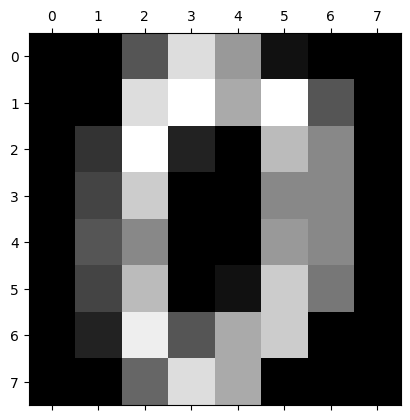

In [ ]:
import matplotlib.pyplot as plt

plt.gray()
plt.matshow(digits.images[0])

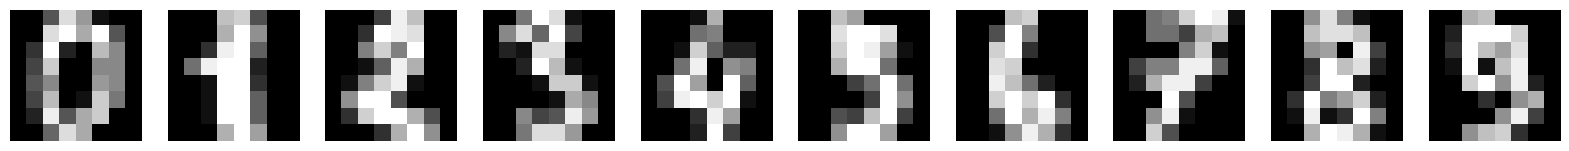

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(20, 4))
plt.gray()

for i, ax in enumerate(axes):
  ax.matshow(digits.images[i])
  ax.axis('off')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

### 모델 훈련, 테스트, 검증

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
clf.score(X_test, y_test)

0.9638888888888889

In [ ]:
clf.predict(digits.data[0:9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8])


***Confusion Matrix***


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 24,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  3,  1,  0,  0,  1,  0,  0, 25,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  2, 25]])

Text(95.72222222222221, 0.5, 'Truth')

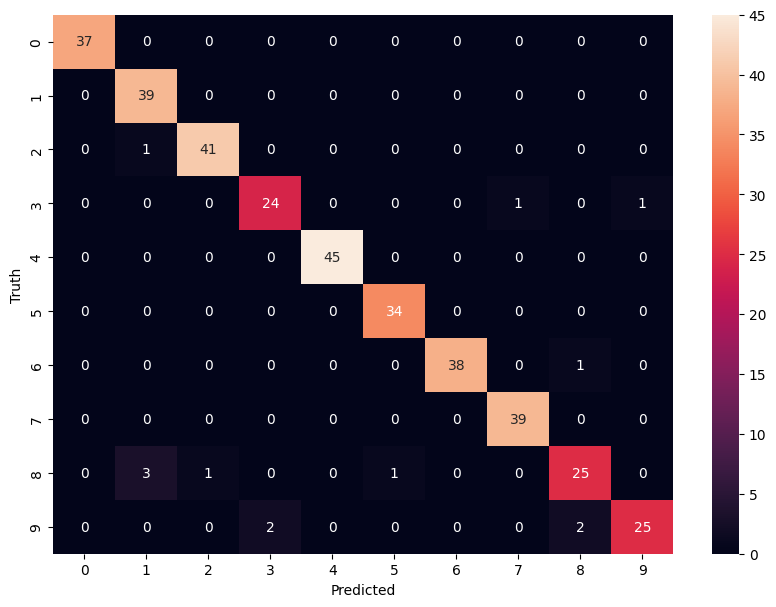

In [ ]:
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Optional(틀린데이터 찾기)

In [ ]:
import pandas as pd

test_df = pd.DataFrame({'Predicted': y_pred, 'Truth': y_test})
miss_df = test_df[test_df.Predicted != test_df.Truth]
miss_df.head()

,Predicted,Truth
17,5,8
40,7,3
57,8,9
152,8,6
159,1,2


In [ ]:
X_test[17]

array([ 0.,  0.,  5., 12., 16., 10.,  0.,  0.,  0.,  6., 16., 13.,  3.,
       15.,  1.,  0.,  0., 11.,  8.,  5.,  5., 10.,  0.,  0.,  0.,  4.,
       11.,  2., 12.,  2.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,
        0.,  0.,  0.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 13.,
        8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.])

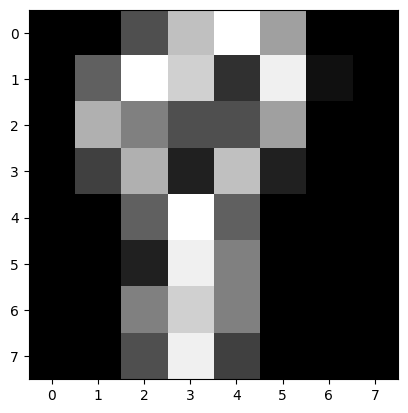

In [ ]:
bitmap = X_test[17].reshape(8, 8)

plt.imshow(bitmap, cmap='gray')

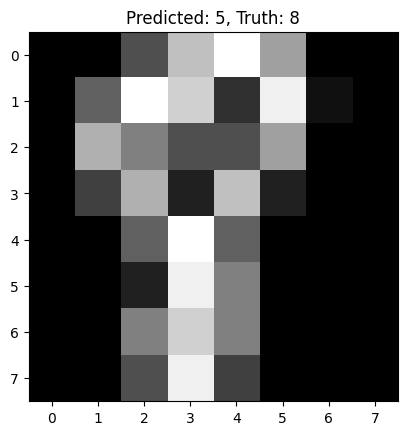

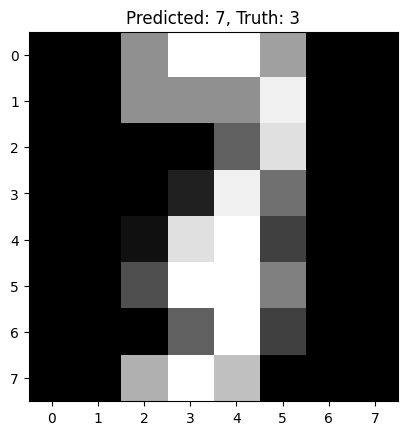

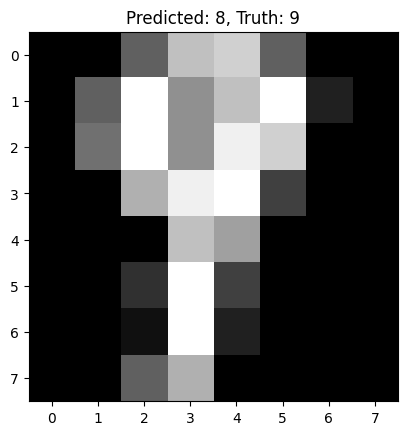

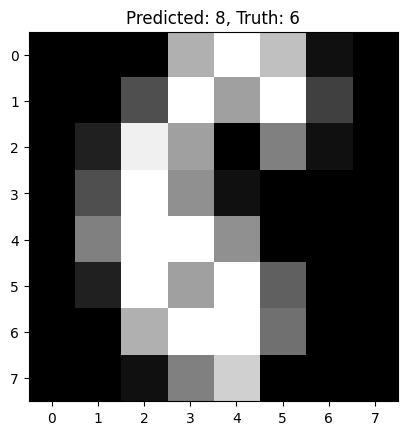

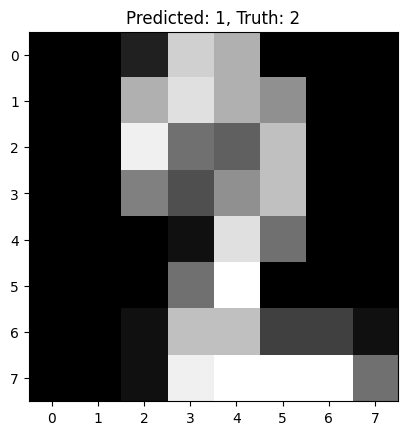

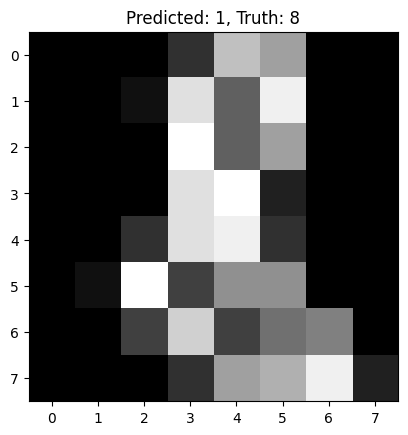

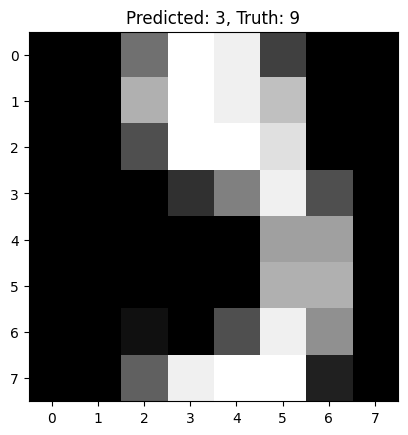

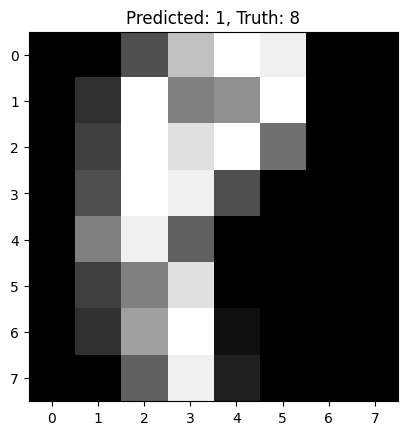

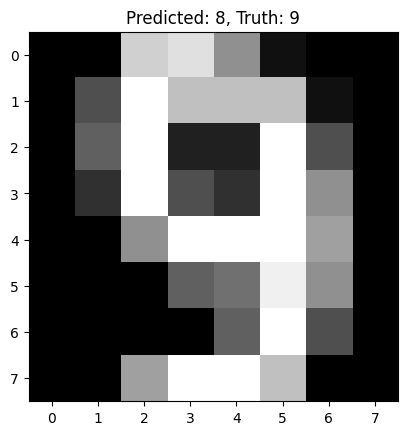

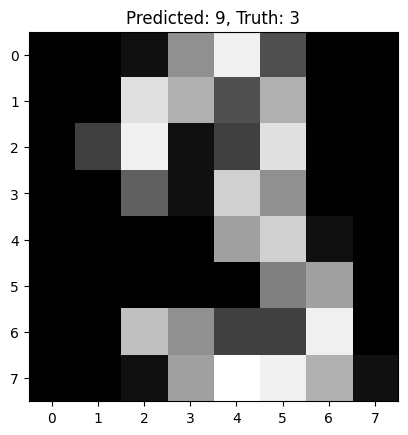

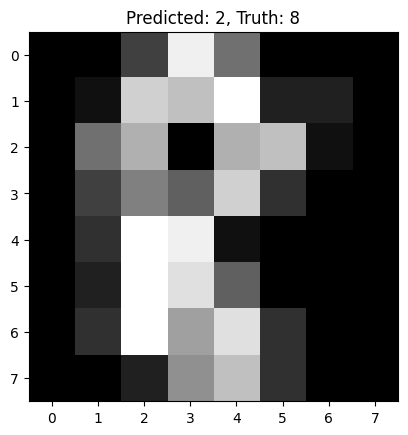

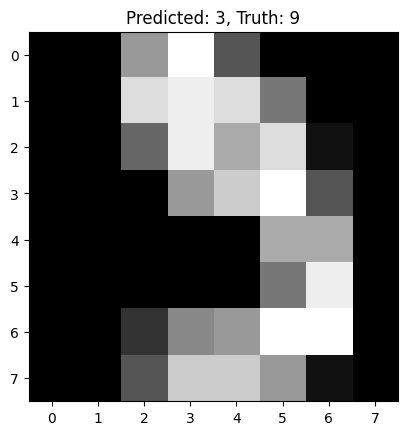

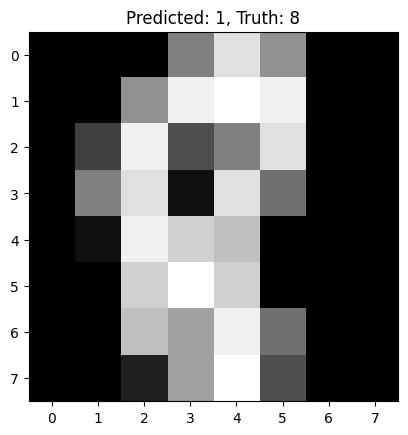

In [ ]:
for index in miss_df.index:
  bitmap = X_test[index].reshape(8, 8)
  plt.figure()
  plt.imshow(bitmap, cmap='gray')
  plt.title(f"Predicted: {miss_df.loc[index, 'Predicted']}, Truth: {miss_df.loc[index, 'Truth']}")
  plt.show()